In [3]:
from hsfs import Hamiltonian, rad_overlap
from sympy.physics.wigner import clebsch_gordan, wigner_3j, wigner_6j
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
%matplotlib inline

In [4]:
state_1_electron_1_n, state_1_electron_1_L = 1, 0
state_2_electron_1_n, state_2_electron_1_L = 1, 0
rad_overlap(state_1_electron_1_n, state_1_electron_1_L, \
            state_2_electron_1_n, state_2_electron_1_L, \
            p=-3.0)

0.6384345587781668

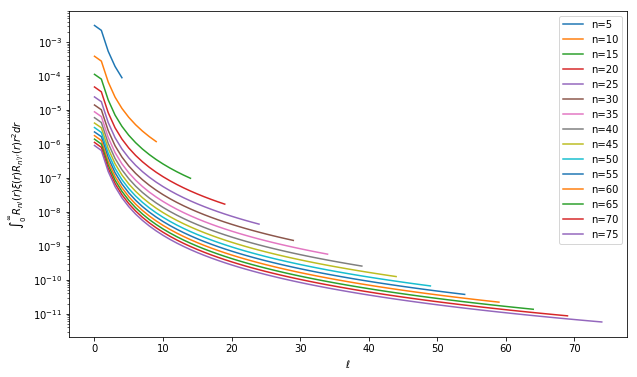

In [5]:
plt.figure(figsize=(10,6))
state_1_electron_1_n, state_1_electron_1_L = 1, 0
state_2_electron_1_n, state_2_electron_1_L = 1, 0

rad_overlaps = []
n_vals = np.arange(5,80,5)
L_vals = []
for n in n_vals:
    tmp = []
    L_vals.append(np.arange(0, n, 1))
    for L in L_vals[-1]:
        state_1_electron_2_n, state_1_electron_2_L = n, L
        state_2_electron_2_n, state_2_electron_2_L = n, L
        tmp.append( rad_overlap(state_1_electron_2_n, state_1_electron_2_L, \
                                state_2_electron_2_n, state_2_electron_2_L, \
                                p=-3.0) )
    rad_overlaps.append(np.array(tmp))

for n_val, overlap, L_val in zip(n_vals, rad_overlaps, L_vals):
    _= plt.semilogy(L_val, np.abs(overlap), '-', label='n='+str(n_val))
_= plt.legend()
_= plt.xlabel('$\ell$')
_= plt.ylabel("$\int_0^{\infty}R_{nl}(r) \\xi(r) R_{n'l'}(r) r^2 dr$")

In [19]:
# construct matrix
n_min = 2
n_max = 2
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=None)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 16


In [30]:
terms = [[],[]]

for state_1 in tqdm(mat0.basis):
    for state_2 in mat0.basis:

        state_1_n1, state_1_n2 = 1, state_1.n
        state_2_n1, state_2_n2 = 1, state_2.n
        L1, L2 = 0, state_1.L

        zeta_1 = 0.5 * rad_overlap(state_1_n1, L1, state_2_n1, L2, p=-3.0)
        zeta_2 = 0.5 * rad_overlap(state_1_n2, L1, state_2_n2, L2, p=-3.0)

        terms[0].append( (zeta_1 * (-1)**(state_1.S + state_2.S + state_1.J + L1 + L2 + 1) * \
            ((2*state_2.L+1) * (2*state_1.L+1) * (2*state_2.S+1) * (2*state_1.S+1) \
            * (2*L1+1) * L1 * (L1+1) * (3./2))**0.5 * \
            wigner_6j(L1, state_1.L, L2, state_2.L, L1, 1)) )
        terms[1].append( (zeta_2 * (-1)**(2*state_1.S + state_1.L + state_2.L + state_1.J + L1 + L2 + 1) * \
            ((2*state_2.L+1) * (2*state_1.L+1) * (2*state_2.S+1) * (2*state_1.S+1) \
            * (2*L2+1) * L2 * (L2+1) * (3./2))**0.5 * \
            wigner_6j(L2, state_1.L, L1, state_2.L, L2, 1)) )


100%|██████████| 16/16 [00:00<00:00, 143.99it/s]


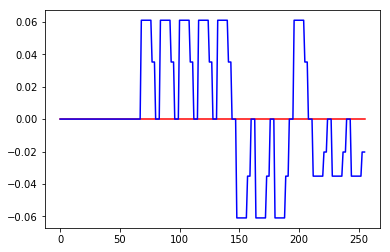

In [33]:
plt.plot(terms[0], 'r')
plt.plot(terms[1], 'b')